In [1]:
%matplotlib inline
import cv2
import numpy as np

# Auxiliar Functions

In [2]:
def invertChannels(img):
    b,g,r = cv2.split(img) # split channels
    return cv2.merge((r,g,b)) # merge in rgb order to display with matplotlib

In [3]:
# power law tranformation
def power_law_lut(c, g):
    table = np.zeros(256,'uint8')

    table = np.array([( c * (i / 255.0) ** g) * 255 for i in np.arange(0, 256)]).astype("uint8")

    return np.array([table.astype('uint8')])

In [4]:
# mean square error
def mse(imageA, imageB):
    # the 'Mean Squared Error' between the two images is the
    # sum of the squared difference between the two images;
    # NOTE: the two images must have the same dimension
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])

    # return the MSE, the lower the error, the more "similar"
    return err

# Iris

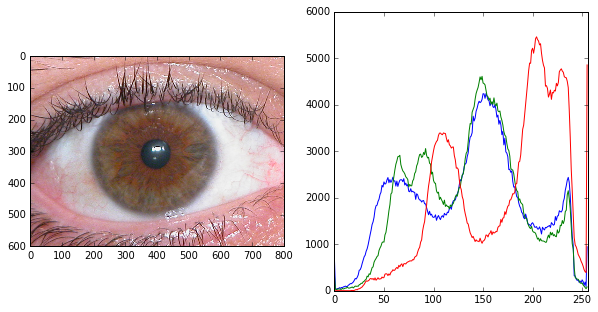

In [5]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('../colorImages/iris.jpg')
img1 = cv2.imread('../colorImages/iris_1.jpg')
img2 = cv2.imread('../colorImages/iris_2.jpg')
img3 = cv2.imread('../colorImages/iris_3.jpg')
img4 = cv2.imread('../colorImages/iris_4.jpg')

plt.figure(figsize=(10,5)) 

plt.subplot(121)
plt.imshow(invertChannels(img))

plt.subplot(122)
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])    

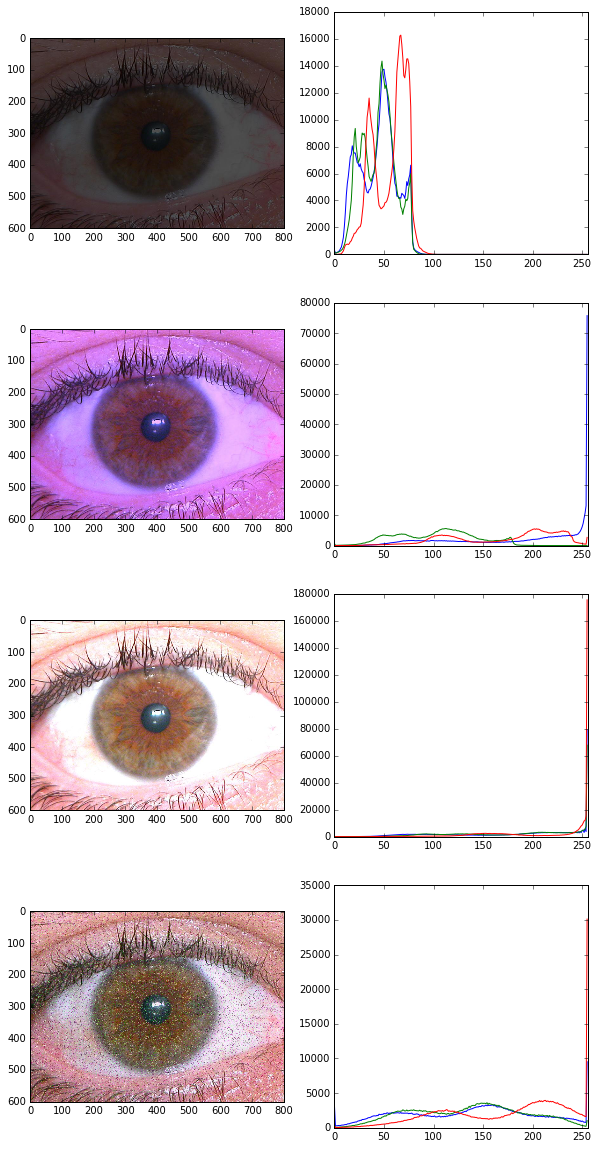

In [6]:
plt.figure(figsize=(10,20)) 
plt.subplot(421);plt.imshow(invertChannels(img1))
plt.subplot(422)
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img1],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])  

plt.subplot(423);plt.imshow(invertChannels(img2))
plt.subplot(424)
for i,col in enumerate(color):
    histr = cv2.calcHist([img2],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])  
    
plt.subplot(425);plt.imshow(invertChannels(img3))
plt.subplot(426)
for i,col in enumerate(color):
    histr = cv2.calcHist([img3],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])  
    
plt.subplot(427);plt.imshow(invertChannels(img4))
plt.subplot(428)
for i,col in enumerate(color):
    histr = cv2.calcHist([img4],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])  

# Iris_4 Image filtering

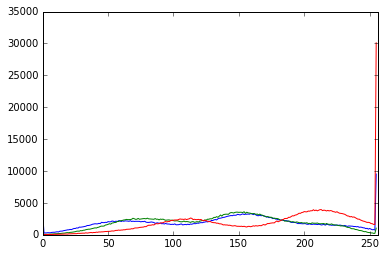

In [7]:
for i,col in enumerate(color):
    histr = cv2.calcHist([img4],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])

# Gaussian Filter

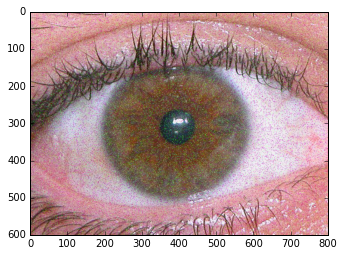

In [30]:
img4r = cv2.GaussianBlur(img4,(5,5),0) 
plt.imshow(invertChannels(blur))

In [11]:
# mean square error comparation
print "MSE between Original and Iris2: %s" % mse(img,img4)
print "MSE between Original and Iris enchanced: %s" % mse(img,img4r)

MSE between Original and Iris2: 3304.79249375
MSE between Original and Iris enchanced: 560.343579167


# Median Filter

MSE between Original and Iris2: 3304.79249375
MSE between Original and Iris enchanced: 539.546908333


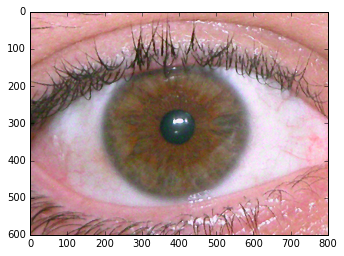

In [34]:
# manual trial and error with kernel size of 1,3,5,7.
img4r = cv2.medianBlur(img4,5) 
plt.imshow(invertChannels(img4r))
# mean square error comparation
print "MSE between Original and Iris2: %s" % mse(img,img4)
print "MSE between Original and Iris enchanced: %s" % mse(img,img4r)

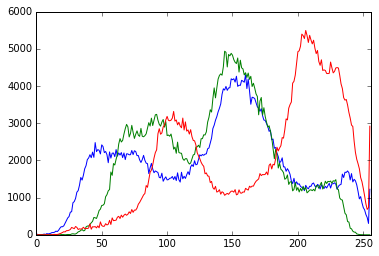

In [35]:
for i,col in enumerate(color):
    histr = cv2.calcHist([img4r],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])